## 1. Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
import math

## 2. Initialise function

In [9]:
def FIFA(x):
   
    #Column Cleaning
  
    #change titles to lower case 
    lower = []
    for i in x.columns:
        lower.append(i.lower())
    x.columns = lower
  
    #Rename unclear column names
    x = x.rename(columns={'weight':'weight kg','loan date end':'on_loan', 'value':'value_€','wage':'wage_€','release clause':'release_clause_€','bp' : 'best position','a/w' : 'attacking workrate','d/w':'defensive workrate','ir' : 'international reputation','w/f':'weak foot','sm' : 'skill move','ova':'ovr'})
    

    #Puts underscore instead of spaces
    under_ = []
    for i in x.columns:
        if ' ' in i:
            under_.append(i.replace(' ', '_'))
        else:
            under_.append(i)
    x.columns = under_   


    
    #Value Cleaning

    #cleaned up the final columns (taking + out)
    def split(y):
        y = y.str.split("+", n = 1, expand = True)[0]
        return y 
    
    cols = x[['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk']]
    for i in cols:
        x[i] = split(cols[i])
        x[i] = x[i].astype(int)
        
        
    #Remove stars from values in columns
    x['skill_move']=x['skill_move'].str.replace('★','') 
    x['weak_foot']=x['weak_foot'].str.replace('★','')
    x['international_reputation']=x['international_reputation'].str.replace('★','')
    
    
    #Fill Nulls and create boolean values for on_loan column
    x['on_loan'] = x['on_loan'].fillna(0)
    
    numb = []
    for i in x['on_loan']:
        if i != 0:
            numb.append(1)
        else:
            numb.append(0)

    x['on_loan'] = numb
    
    
    #Convert money to int by removing characters and punctuation, then correcting the amounts
    def moneycon(x):

        money = []
        for i in x:
            i = i.replace("€",'')
            if 'K' in i:
                i = i.replace("K",'')
                i = i.replace(".",'')
                i = float(i)
                i = float(i * 1000)
                i = int(i)
                money.append(i)
            elif 'M' in i:
                i = i.replace("M",'')
                i = float(i)
                i = float(i * 1000000)
                i = int(i)
                money.append(i)
            else:
                money.append(i)   
            
        return money
    
    x['value_€'] = moneycon(x['value_€'])
    x['wage_€'] = moneycon(x['wage_€'])
    x['release_clause_€'] = moneycon(x['release_clause_€'])
    x['hits'] = moneycon(x['hits'])
    
    x['value_€'] = pd.to_numeric(x['value_€'])
    x['wage_€'] = pd.to_numeric(x['wage_€'])
    x['release_clause_€'] = pd.to_numeric(x['release_clause_€'])
    x['hits'] = pd.to_numeric(x['hits'])
    
    x['defensive_workrate'] = x['defensive_workrate'].fillna("U")
    x['defensive_workrate'] = x['defensive_workrate'].map({'Low':1,'Medium':2,'High':3, "U":0})
    x['attacking_workrate'] = x['attacking_workrate'].fillna("U")
    x['attacking_workrate'] = x['attacking_workrate'].map({'Low':1,'Medium':2,'High':3, "U":0})
    x['foot'] = x['foot'].fillna("U")
    x['foot'] = x['foot'].map({'Right':0,'Left':1})
    
    
    #x['gk'] = x['gk'].map({'None':0})
    
    
    #Convert columns to integers
    x['international_reputation'] = x['international_reputation'].astype(int)
    x['skill_move'] = x['skill_move'].astype(int)
    x['weak_foot'] = x['weak_foot'].astype(int)

    
    #Convert weight and height columns to metric measurements
    
    weight=[]
    for i in x['weight_kg']:
        i = i.replace('lbs','')
        i = float(i)*0.453592
        weight.append(round(i,2))
                     
    x['weight_kg'] = weight
    
    x = x[x['club'].isna()==False]
    
    
    x['heightm'] = x['height'].str.split("'", n = 1, expand = True)[0]
    x['heightcm'] = x['height'].str.split("'", n = 0, expand = True)[0]

    changetype = x[[]]

    heightmcon = []
    for i in x['heightm']:
        i = float(i) * 30.48
        i = int(i)
        heightmcon.append(i)
    x['heightm'] = heightmcon

    heightcmcon= []
    for i in x['heightcm']:
        i = float(i) * 2.54
        i = int(i)
        heightcmcon.append(i)
    x['heightcm'] = heightcmcon

    x['height'] = x['heightm']+x['heightcm']
    
    hdrop = x[['heightm','heightcm']]
    x[i] = x.drop(hdrop, axis = 1, inplace = True)
    
 
    
    #Determine the columns to be included in the final dataframe (gk has problems with datatype, if i had more time, i would correct this)
    x = x[['name','age','nationality','best_position','height','weight_kg','foot','growth','value_€','wage_€','release_clause_€','on_loan','attacking','skill','movement','power','mentality','defending','goalkeeping','total_stats','base_stats','weak_foot','skill_move','attacking_workrate','defensive_workrate','international_reputation','pac','sho','pas','dri','def','phy','hits','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk','ovr']]

    return x

## 3. Import csv files

In [10]:
fifa_train = pd.read_csv('2.1 Fifa21 Project/fifa21_train.csv')
fifa_validate = pd.read_csv('2.1 Fifa21 Project/fifa21_validate.csv')

In [11]:
fifa_t = FIFA(fifa_train)
fifa_v = FIFA(fifa_validate)

## 4. Prepare the model

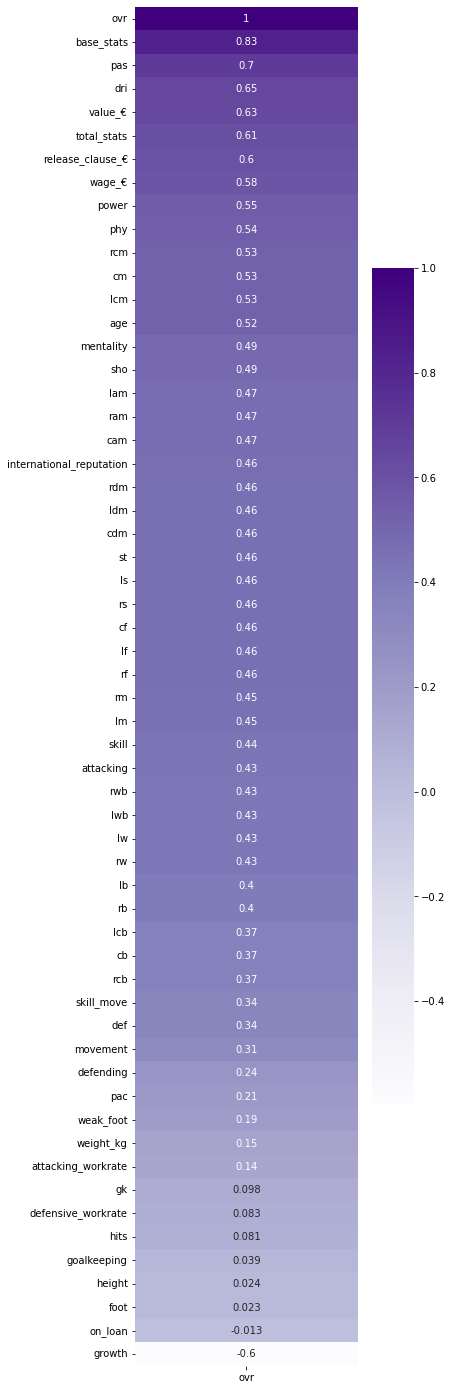

In [12]:
#Visualise the Correlation of columns in a heatmap
corr = fifa_t.corr().loc[:,['ovr']]
fig, ax = plt.subplots(figsize=(5,25))
ax = sns.heatmap(corr.sort_values(by=['ovr'],ascending=False), ax=ax,annot=True,cbar=True,cmap="Purples")
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)
plt.show()



In [14]:
#Separate Numerical from Categorical columns

numerical = fifa_t.select_dtypes(include=np.number)
categorical = fifa_t.select_dtypes(include=np.object)


#Split  
y = numerical['ovr']
X = numerical.drop(['ovr'], axis=1)
#X_num = X.select_dtypes(include = np.number)

#Normalise the numerical data    
MinMaxtransformer = MinMaxScaler().fit(X)
x_normalized = MinMaxtransformer.transform(X)
x_normalized = pd.DataFrame(x_normalized,columns=X.columns)
X_num = x_normalized


#Drop columns ahead of one-hot-encoding
X_cat = categorical.drop(columns=['name','nationality'], axis=1)

#One-hot-encode the categorical columns
encoder2 = OneHotEncoder(drop='first').fit(X_cat)
encoded_for_p2 = encoder2.transform(X_cat).toarray()
cols = encoder2.get_feature_names(input_features=X_cat.columns)
onehot_encoded_for_p2 = pd.DataFrame(encoded_for_p2, columns=cols)
onehot_encoded_for_p2.head()
X_cat = onehot_encoded_for_p2

#Concatenate the numerical and one-hot-encoded data
Xdf = pd.concat([X_cat,X_num], axis=1)

/var/folders/sm/8s2c1j894rq6v788yfhxt27r0000gn/T/ipykernel_26019/2215693403.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = fifa_t.select_dtypes(include=np.object)


In [16]:
Xdf.shape

(11683, 71)

## 5. Split & Train

In [20]:
X_train, X_test, y_train, y_test = tts(Xdf, y, test_size=0.2, random_state=42)

In [21]:
linreg = LinReg()
linreg.fit(X_train,y_train)
y_pred_linreg = linreg.predict(X_test)

In [22]:
lm = linear_model.LinearRegression()

In [23]:
lm.fit(Xdf,y)
print(lm.intercept_)
print(lm.coef_)

-241538597831.44754
[ 4.31015184e+00  6.89327575e-01 -3.38351949e-01 -6.27272702e-01
 -3.37641303e+00  1.95206069e+00  5.05191619e-01  9.17980710e-01
  1.59365903e+00  2.17588115e+00  3.53435700e-01  5.43803610e-01
  1.48319124e+00  4.61826471e-01  1.68853027e+00  1.32012972e-01
  1.14443784e+00  8.45441111e-02 -2.66024705e+00  2.27586646e+01
  1.68154707e+00 -5.12602310e+00  2.83318690e-01 -8.64738299e+11
 -9.13968450e+11 -7.51294908e+11 -6.65677255e+11 -7.68418439e+11
 -5.35110334e+11 -9.13968450e+11  3.36691422e+12 -2.64023325e+12
  1.95942151e-02  3.03849269e+00 -3.04974323e-01 -3.66100702e-01
  1.74495634e+00  7.05405830e+11  7.65869187e+11  6.85251378e+11
  6.75174152e+11  7.75946413e+11  6.65096926e+11  4.77230623e+00
 -1.60938818e+10  8.00251870e+09  8.09136312e+09  7.97142255e+10
 -3.65631596e+10  1.82611073e+10  1.83020524e+10 -7.97142255e+10
 -3.72009916e+10  1.86004958e+10  1.86004958e+10 -5.14014986e+09
  4.39238519e+10 -2.19619260e+10 -2.19619260e+10  5.14014985e+09
 -3.5

In [24]:
pred = lm.predict(X_test)



In [25]:
pred

array([61.88986206, 58.71383667, 76.69927979, ..., 62.91574097,
       71.07061768, 76.86029053])

In [26]:
train_r2 = linreg.score(X_train, y_train)
test_r2 = linreg.score(X_test, y_test)
print (f'Train R2: {train_r2} \nTest R2: {test_r2}')

Train R2: 0.8959020914119747 
Test R2: 0.8933370368970607


In [29]:
train_mse=mean_squared_error(linreg.predict(X_train), y_train)
test_mse=mean_squared_error(linreg.predict(X_test), y_test)
print(f'Train MSE: {train_mse} \nTest MSE: {test_mse}')

Train MSE: 4.92829757389307 
Test MSE: 4.945849409968515


In [30]:
rmse = np.sqrt(test_mse)
rmse

2.2239265747700654

## 6. Test the regression against our model

In [31]:
#Separate Numerical from Categorical columns
numerical_ = fifa_v.select_dtypes(include=np.number)
categorical_ = fifa_v.select_dtypes(include=np.object)
  
    
#Split
y_ = numerical_['ovr']
X_ = numerical_.drop(['ovr'], axis=1)


#Normalise the numerical data    
x_normalized_ = MinMaxtransformer.transform(X_)
x_normalized_ = pd.DataFrame(x_normalized_,columns=X_.columns)
X_num_ = x_normalized_


#Drop any categorical data ahead of one-hot-encoding
X_cat_ = categorical_.drop(columns=['name','nationality'], axis=1)

#One-hot-encode the categorical columns
encoded_for_p2_ = encoder2.transform(X_cat_).toarray()
cols_ = encoder2.get_feature_names(input_features=X_cat_.columns)
onehot_encoded_for_p2_ = pd.DataFrame(encoded_for_p2_, columns=cols_)
X_cat_ = onehot_encoded_for_p2_


#Concatenate the numerical and one-hot-encoded data
Xdf_ = pd.concat([X_cat_,X_num_], axis=1)


/var/folders/sm/8s2c1j894rq6v788yfhxt27r0000gn/T/ipykernel_26019/2810660953.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_ = fifa_v.select_dtypes(include=np.object)


In [32]:
display(X_cat.shape)
display(X_num.shape)

display(X_cat_.shape)
display(X_num_.shape)

(11683, 14)

(11683, 57)

(1996, 14)

(1996, 57)

In [33]:
Xdf_.shape

(1996, 71)

In [34]:
Xdf.shape

(11683, 71)

In [35]:
validation_prediction = lm.predict(Xdf_)
validation_prediction

array([65.17474365, 66.36257935, 54.6444397 , ..., 73.95730591,
       64.08468628, 60.33807373])

In [39]:
validations_mse= mean_squared_error(validation_prediction, y_)

In [40]:
print(validations_mse)

5.066801537724141


In [41]:
rmse = np.sqrt(validations_mse)
rmse

2.250955694305008